<a href="https://colab.research.google.com/github/MustofAhmed41/4-Wheel-Drive-Proteus/blob/master/Fully%20Connected%20Network_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Library

In [20]:
import pandas as pd  
import seaborn as sns  
import numpy as np  
import matplotlib.pyplot as plt

In [39]:
import tensorflow as tf
import keras
from tensorflow.keras import activations
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
cd'/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1'

/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1


## Loading Data

In [42]:
#df = pd.read_excel('pml-training.xlsx', index_col=False).drop('Row Number', axis=1).reset_index(drop=True)

## Deep Learning

In [43]:
load = pd.read_csv('thesis_processed.csv')

In [137]:
df = load.copy()

In [138]:
df.shape

(19434, 23)

In [139]:
def impute_classe(x):
  if x == 'Severe':
    return 4
  elif x =='Moderately Severe':
    return 3
  elif x=='Moderate':
    return 2
  elif x=='Mild':
    return 1
  elif x=='None':
    return 0

In [140]:
df['PHQ-Label'] = df['PHQ-Label'].apply(impute_classe)

In [141]:
df['PHQ-Label'].value_counts()

1    7861
2    7026
0    3509
3     606
4     432
Name: PHQ-Label, dtype: int64

In [142]:
df.columns

Index(['Unnamed: 0', 'ACCELEROMETER_X', 'ACCELEROMETER_Y', 'ACCELEROMETER_Z',
       'BATTERY_LEVEL', 'Light_v', 'GRAV_X', 'GRAV_Y', 'GRAV_Z', 'GYROSCOPE_X',
       'GYROSCOPE_Y', 'GYROSCOPE_Z', 'MAG_X', 'MAG_Y', 'MAG_Z',
       'ORIENTATION_AZIMUTH', 'ORIENTATION_PITCH', 'ORIENTATION_ROLL',
       'SENSORGPS_LATITUDE', 'SENSORGPS_LONGITUDE', 'PHQ-Label',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [143]:
lst = ['Unnamed: 0', 'PHQ-Label', 'Light_v', 'ORIENTATION_AZIMUTH', 'ORIENTATION_PITCH', 
       'ORIENTATION_ROLL',  'SENSORGPS_LATITUDE', 'SENSORGPS_LONGITUDE' ]
X=df.drop(lst, axis=1)
Y=df['PHQ-Label'] 

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [145]:
X_train

,ACCELEROMETER_X,ACCELEROMETER_Y,ACCELEROMETER_Z,BATTERY_LEVEL,GRAV_X,GRAV_Y,GRAV_Z,GYROSCOPE_X,GYROSCOPE_Y,GYROSCOPE_Z,MAG_X,MAG_Y,MAG_Z,Gender_Female,Gender_Male
9629,0.831305,1.051080,0.225047,0.701698,0.854227,1.049454,0.227930,-0.016769,0.021071,-0.004875,-0.446548,0.125817,-0.686689,0,1
4706,0.011193,-0.396521,0.749750,0.580740,0.025548,-0.432268,0.773468,-0.010668,-0.003706,-0.011879,0.155258,0.754868,0.087953,0,1
10482,-0.100984,1.483894,0.022228,-1.878732,-0.115960,1.529546,-0.027115,-0.028520,0.017256,-0.007450,0.431377,-0.244988,-0.607780,0,1
3784,-0.172443,-0.253534,-2.442620,-1.354582,-0.186682,-0.284091,-2.495998,-0.008757,0.016929,-0.011337,-0.704118,0.219362,1.061155,0,1
11251,-0.102478,-0.457111,0.723708,0.661379,-0.116234,-0.487720,0.777646,-0.089535,-0.061773,-0.113526,0.098027,1.156190,-0.210248,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,0.260726,-0.619101,-2.480201,1.064571,0.253824,-0.652877,-2.474219,-0.010668,0.018961,-0.005791,-1.077244,-0.000775,0.974802,1,0
18106,-4.076908,-3.113549,-5.026417,-1.193306,-2.514517,-0.304879,-1.828560,-20.798877,-0.947677,-14.453593,0.371105,0.625500,0.993335,0,1
2908,-0.324908,0.301300,0.696279,1.629040,-0.333804,0.269383,0.693485,-0.077524,0.105755,-0.022416,0.277505,0.537721,-0.365382,0,1
5947,-0.055287,-0.164935,-2.497667,1.185529,-0.068551,-0.198534,-2.488698,-0.010668,0.018706,-0.007379,-0.635924,-0.694887,1.058932,1,0


In [146]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [147]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 2456, 1: 5502, 2: 4918, 3: 424, 4: 303}

In [148]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [149]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 5502, 1: 5502, 2: 5502, 3: 5502, 4: 5502}

In [150]:
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss Vs Epoch')

        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [151]:
X_train, Y_train = x_train_res, y_train_res

In [152]:
model=tf.keras.Sequential([
          tf.keras.layers.Dense(100,activation='relu',input_shape=(X.shape[1],), use_bias=False,),         
          tf.keras.layers.Dense(500,activation='relu', use_bias=False,),  
          tf.keras.layers.Dense(5,activation='softmax')           
])

In [153]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [154]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1500      
                                                                 
 dense_7 (Dense)             (None, 500)               50000     
                                                                 
 dense_8 (Dense)             (None, 5)                 2505      
                                                                 
Total params: 54,005
Trainable params: 54,005
Non-trainable params: 0
_________________________________________________________________


In [155]:
tf.keras.utils.set_random_seed(5)
#2 3 4

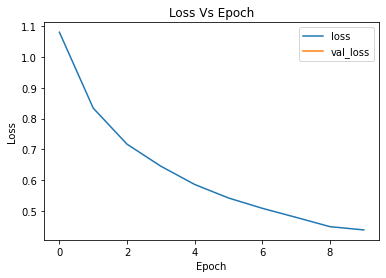

In [156]:
trained_model=model.fit(X_train,Y_train,epochs=10, batch_size=10, callbacks=[plot_losses], verbose=0, )

In [157]:
Y_pred = model.predict(X_test)

In [158]:
Y_pred

array([[7.1089366e-05, 5.2756006e-03, 2.4466377e-03, 9.9220276e-01,
        3.9578190e-06],
       [2.0573086e-01, 1.3027415e-01, 6.6333705e-01, 6.5770932e-04,
        2.1802158e-07],
       [9.7155094e-01, 1.7661773e-02, 1.0639342e-02, 1.4791456e-04,
        2.8903125e-13],
       ...,
       [1.3202014e-02, 1.8893721e-02, 8.2282703e-03, 9.5967597e-01,
        9.3190948e-09],
       [4.0846355e-03, 2.8452334e-01, 7.0645809e-01, 4.5878394e-03,
        3.4602138e-04],
       [3.5796264e-05, 1.3495282e-02, 9.8593026e-01, 5.3860643e-04,
        2.6944636e-12]], dtype=float32)

In [159]:
Y_pred = Y_pred.argmax(axis=1) 
Y_pred

array([3, 2, 0, ..., 3, 2, 2])

In [160]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66      1053
           1       0.79      0.62      0.69      2359
           2       0.68      0.66      0.67      2108
           3       0.32      0.70      0.44       182
           4       0.31      0.46      0.37       129

    accuracy                           0.66      5831
   macro avg       0.54      0.64      0.57      5831
weighted avg       0.69      0.66      0.66      5831



In [161]:
accuracy_score(Y_test, Y_pred)

0.6563196707254331

In [162]:
confusion_matrix(Y_test,Y_pred)

array([[ 788,   74,  153,   30,    8],
       [ 231, 1461,  457,  142,   68],
       [ 281,  285, 1392,   96,   54],
       [  15,   21,   18,  127,    1],
       [  11,   19,   35,    5,   59]])

In [163]:
pd.crosstab(Y_test,Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,All
True,,,,,,
0,788,74,153,30,8,1053
1,231,1461,457,142,68,2359
2,281,285,1392,96,54,2108
3,15,21,18,127,1,182
4,11,19,35,5,59,129
All,1326,1860,2055,400,190,5831


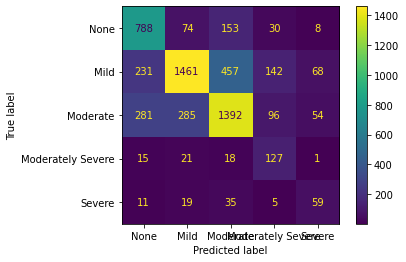

In [164]:
cm = confusion_matrix(Y_test,Y_pred)
ConfusionMatrixDisplay(cm, display_labels=['None', 'Mild', 'Moderate', 'Moderately Severe', 'Severe']).plot()

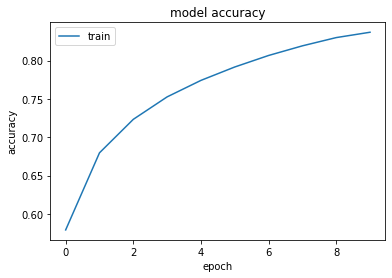

In [165]:
plt.plot(trained_model.history['accuracy'])
#plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

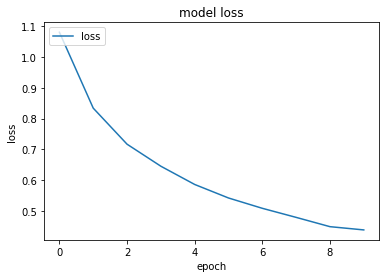

In [166]:
plt.plot(trained_model.history['loss'])
#plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val'], loc='upper left')
plt.show()